# HW 9

ISE 530 Optimization for Analytics Homework IX: Integer Programming. Due 11:59 PM Tuesday November 24, 2020

- You, as the leader of an oil exploration drilling venture, must determine the best selection of five out of ten possible sites. Label the sites as $s_1, s_2, \cdots , s_{10}$ and the expected profits associated with each as $p_1, p_2, \cdots , p_{10}$.

    - If site $s_2$ is explored, then site $s_3$ must also be explored.
    
    - Exploring sites $s_1$ and $s_7$ will disallow the exploration of site s8.
    
    - Exploring sites $s_3$ or $s_4$ will disallow the exploration of site $s_5$.
    
- You have \\$14,000 to invest among four different investment opportunities. Investment 1 requires an investment of \\$7,000 and has a net present value of \\$11,000; investment 2 requires an investment
of \\$5,000 and has a net present value of \\$8,000; investment 3 requires an investment of \\$4,000 and 4 has a net present value of \\$6,000; investment 4 requires an investment of \\$3,000 and has a net
present value of \\$4,000. These are all "take it or leave it" opportunities and you are not allowed to invest partially in any of the projects. The objective is to maximize the total value given
the budget constraint. Formulate this problem as a binary integer program and solve it by the branch-and-bound technique.

- Solve the following two integer programs by the branch-and-bound algorithm:


1. 

\begin{align}
    \underset{x \geq 0 \text{ integer }}{\text{maximize }}\qquad&2x_1 + x_2 \\
    \text{subject to }\qquad&x_1 + x_2 \leq 5 \\
    &x_2 - x_1 \leq 0 \\
    \text{and }\qquad&6x_1 + 2x_2 \leq 21. \\
\end{align}


2. 

\begin{align}
    \underset{x \geq 0 \text{ integer }}{\text{maximize }}\qquad&2x_1 + x_2 + 4x_3 + 5x_4 \\
    \text{subject to }\qquad&x_1 + 3x_2 + 2x_3 + 5x_4 \leq 10 \\
    \text{and }\qquad&3x_1 - x_2 - 5x_3 + 10x_4 \leq -4. \\
\end{align}

- Consider the integer programming problem:

\begin{align}
    \underset{x}{\text{maximize }}\qquad&x_1 + x_2 \\
    \text{subject to }\qquad&-3x_1 + 4x_2 \leq 4 \\
    &3x_1 + 2x_2 \leq 11 \\
    &2x_1 - x_2 \leq 5 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

Use a figure to answer the following questions.

(a) What is the optimal objective value of the linear programming relaxation? What is the optimal objective value of the integer program?

(b) What is the convex hull of the set of all feasible solution to the integer program?

(c) Construct a Gomory cutting plane using the optimal linear programming solution.

(d) Starting with the optimal linear programming solution, solve the integer program using the branch-and-bound method.

(e) Suppose you relax the first constraint. What is the optimal value $Z_{\text{dual}}$ of the Lagrangian dual?

(f) Repeat part (e) by relaxing the third constraint.

- Consider the integer program:
\begin{align}
    \underset{x}{\text{maximize }}\qquad&x_1 + 2x_2 \\
    \text{subject to }\qquad&x_1 + x_2 \leq 5 \\
    &x_1 - 3x_2 \leq -4 \\
    &x_1 \geq 1 \\
    &x_1 - x_2 \leq 0 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

(a) Construct the convex hull of the feasible integer solutions and derive an optimal solution graphically.

(b) Solve the linear program relaxation.

(c) Solve by Lagrangian relaxation of the first constraint.

In [1]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import operator
import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from graphviz import Digraph
import dot2tex
from IPython.display import Latex
from sympy import *
import re

<IPython.core.display.Javascript object>

---

- You, as the leader of an oil exploration drilling venture, must determine the best selection of five out of ten possible sites. Label the sites as $s_1, s_2, \cdots , s_{10}$ and the expected profits associated with each as $p_1, p_2, \cdots , p_{10}$.

    - If site $s_2$ is explored, then site $s_3$ must also be explored.
    
    - Exploring sites $s_1$ and $s_7$ will disallow the exploration of site $s_8$.
    
    - Exploring sites $s_3$ or $s_4$ will disallow the exploration of site $s_5$.

\begin{align}
    \underset{s_i \in \{0, 1\}\,\,\forall\,\,i \in 1,\cdots,10}{\text{maximize }}\qquad&p_{1}s_{1} + p_{2}s_{2} + p_{3}s_{3} + p_{4}s_{4} + p_{5}s_{5} + p_{6}s_{6} + p_{7}s_{7} + p_{8}s_{8} + p_{9}s_{9} + p_{10}s_{10} \\
    \text{subject to }\qquad
    &s_{1} + s_{2} + s_{3} + s_{4} + s_{5} + s_{6} + s_{7} + s_{8} + s_{9} + s_{10} \leq 5 \\
    &s_{2} - s_{3} \leq 0 \\
    &s_{1} + s_{7} +s_{8} \leq 2 \\
    &s_{3} + s_{5} \leq 1 \\
    &s_{4} + s_{5} \leq 1 \\
\end{align}

- You have \\$14,000 to invest among four different investment opportunities. Investment 1 requires an investment of \\$7,000 and has a net present value of \\$11,000; investment 2 requires an investment
of \\$5,000 and has a net present value of \\$8,000; investment 3 requires an investment of \\$4,000 and has a net present value of \\$6,000; investment 4 requires an investment of \\$3,000 and has a net
present value of \\$4,000. These are all "take it or leave it" opportunities and you are not allowed to invest partially in any of the projects. The objective is to maximize the total value given
the budget constraint. Formulate this problem as a binary integer program and solve it by the branch-and-bound technique.

\begin{align}
    \underset{x_i \in \{0, 1\}\,\,\forall\,\,i \in 1,\cdots,4}{\text{maximize }}\qquad&11x_{1} + 8x_{2} + 6x_{3} + 4x_{4} \\
    \text{subject to }\qquad
    &7x_{1} + 5x_{2} + 4x_{3} + 3x_{4} \leq 14 \\
\end{align}

In [2]:
# Converts the optimization problem parameters into the mathematical representation
def solve_lp(x, constraints, obj_coeff, problem_type):
    """Solves the standard LP maximization problem and creates the 
    mathematical formulation of optimization label for graphviz
    """
    obj = cp.Maximize(obj_coeff @ x)
    prob = cp.Problem(obj, constraints)
    prob.solve()

    label = (
        f"{problem_type} {' + '.join([str(coeff) + 'x' + str(i+1) for coeff, i in zip(obj_coeff, range(x.shape[0]))])} "
        + "\nsubject to: \n"
        + "{}".format(
            "\n".join(
                [
                    re.sub(
                        r"x\[([0-9]*)\]",
                        "x"
                        + str(
                            int(
                                re.search(
                                    r"\[[0-9]*\]",
                                    re.sub(r"var[0-9]*", "x", str(constraint)),
                                )
                                .group()
                                .replace("]", "")
                                .replace("[", "")
                            )
                            + 1
                        ),
                        re.sub(r"var[0-9]*", "x", str(constraint)),
                    )
                    if re.search(
                        r"x\[([0-9]*)\]", re.sub(r"var[0-9]*", "x", str(constraint))
                    )
                    is not None
                    else re.sub(r"var[0-9]*", "x", str(constraint))
                    for constraint in constraints
                ]
            )
        )
        + (
            "\n\nObjective Value: "
            + (
                str(np.round(prob.value, 2))
                if prob.status == "optimal"
                else str(prob.value)
            )
            + "\nSolution: "
            + (
                str([np.round(x_i, 2) for x_i in x.value])
                if prob.status == "optimal"
                else prob.status
            )
        )
    )
    return label, prob


# Checks if the number is an integer within specified decimal rounding
is_integer = lambda x, decimals=3: np.round(x, decimals).is_integer()

# Checks if all elements in array are integers
is_integer_solution = lambda x: np.alltrue([is_integer(x_i) for x_i in x])


def branch_and_bound_dfs(root, x, constraints, obj_coeff, problem_type):
    """Iterative DFS traversal of branch and bound tree"""

    node_id = "root"  # ID to map the node of branch and bound tree to the constraints
    stack = (
        []
    )  # To simulate depth first traversal by appending onto stack the node's children
    node_constraints = (
        {}
    )  # A map of the node_id to constraints associated with the node
    visited = []  # A list to keep the nodes already visited

    stack.append((node_id, None))
    node_constraints[node_id] = constraints

    lb, ub = None, None  # Lower bound and upper bound of ILP

    while len(stack) > 0:

        # Visit node
        node_id, parent_node_id = stack.pop()
        visited.append(node_id)

        # Process Root
        label, prob = solve_lp(x, node_constraints[node_id], obj_coeff, problem_type)
        root.node(name=str(node_id), label=label)

        # Add Edge
        if node_id != "root":
            root.edge(
                tail_name=str(parent_node_id),
                head_name=str(node_id),
                label=re.sub(
                    r"x\[([0-9]*)\]",
                    "x"
                    + str(
                        int(
                            re.search(
                                r"\[[0-9]*\]",
                                re.sub(
                                    r"var[0-9]*",
                                    "x",
                                    str(node_constraints[node_id][-1]),
                                ),
                            )
                            .group()
                            .replace("]", "")
                            .replace("[", "")
                        )
                        + 1
                    ),
                    re.sub(r"var[0-9]*", "x", str(node_constraints[node_id][-1])),
                ),
                len="5",
            )

        if prob.status == "optimal":

            # If current solution is integer
            is_integer_current_solution = is_integer_solution(
                np.array(list(prob.solution.primal_vars.values())).flatten()
            )

            # Break Conditions
            if is_integer_current_solution and (
                (ub is None) or (prob.value == np.floor(ub.value))
            ):  # Optimal Integer solution found
                return root, prob

            # Set lower bound of the ilp
            if is_integer_current_solution and (
                (lb is None) or (prob.value > lb.value)
            ):
                lb = prob

            # Set upper bound of the ilp
            if (ub is None) or (prob.value > ub.value):
                ub = prob

            if (
                prob.value > lb.value if lb is not None else True
            ) and not is_integer_current_solution:

                # Find non-integer value of solution
                largest_nonint_idx, largest_nonint_val = sorted(
                    [
                        (idx, x_i)
                        for idx, x_i in enumerate(prob.variables()[0].value)
                        if not is_integer(x_i)
                    ],
                    key=lambda x: x[1],
                    reverse=True,
                )[0]

                # Add left and right children nodes for processing
                stack.append((node_id + " -> left", node_id))
                node_constraints[node_id + " -> left"] = node_constraints[node_id] + [
                    x[largest_nonint_idx] >= np.ceil(largest_nonint_val)
                ]
                stack.append((node_id + " -> right", node_id))
                node_constraints[node_id + " -> right"] = node_constraints[node_id] + [
                    x[largest_nonint_idx] <= np.floor(largest_nonint_val)
                ]

    return root, lb


def branch_and_bound_ilp(x, constraints, obj_coeff, problem_type):
    """Solves Pure Integer Linear Program using
    Branch and Bound method.
    
    Args:
        x (cvxpy.Variable): The integer variables in our problem
        constraints (List[Inequality]): List of inequality constraints to impose on problem
        obj_coeff (numpy.array): The objective coefficients for a linear program
        problem_type (str): Either min, or max (default - min)
        
    Returns:
        
    
    """
    assert (problem_type == "min") or (problem_type == "max"), print(
        "problem_type must be either `min` or `max`."
    )
    # Standardize the optimization problem to be maximization
    if problem_type == "min":
        obj_coeff = -obj_coeff

    # Run the recursive depth-first branch and bound algo
    root = Digraph(
        name="Branch and Bound Tree",
        filename="btree.gv",
        node_attr={"shape": "record", "height": ".1"},
    )
    root.attr("node", shape="box")
    root, prob = branch_and_bound_dfs(root, x, constraints, obj_coeff, problem_type)
    print(
        f"Optimal Objective Value: {np.round(prob.value, 3)} | Integer Solution: {np.round(np.array(list(prob.solution.primal_vars.values())).flatten(), 3)}"
    )
    root.attr(label=r"\n\nBranch and Bound Tree")
    root.attr(fontsize="20")

    display(root)

time: 8.97 ms


<IPython.core.display.Javascript object>

Optimal Objective Value: 21.0 | Integer Solution: [1. 0. 1. 1.]


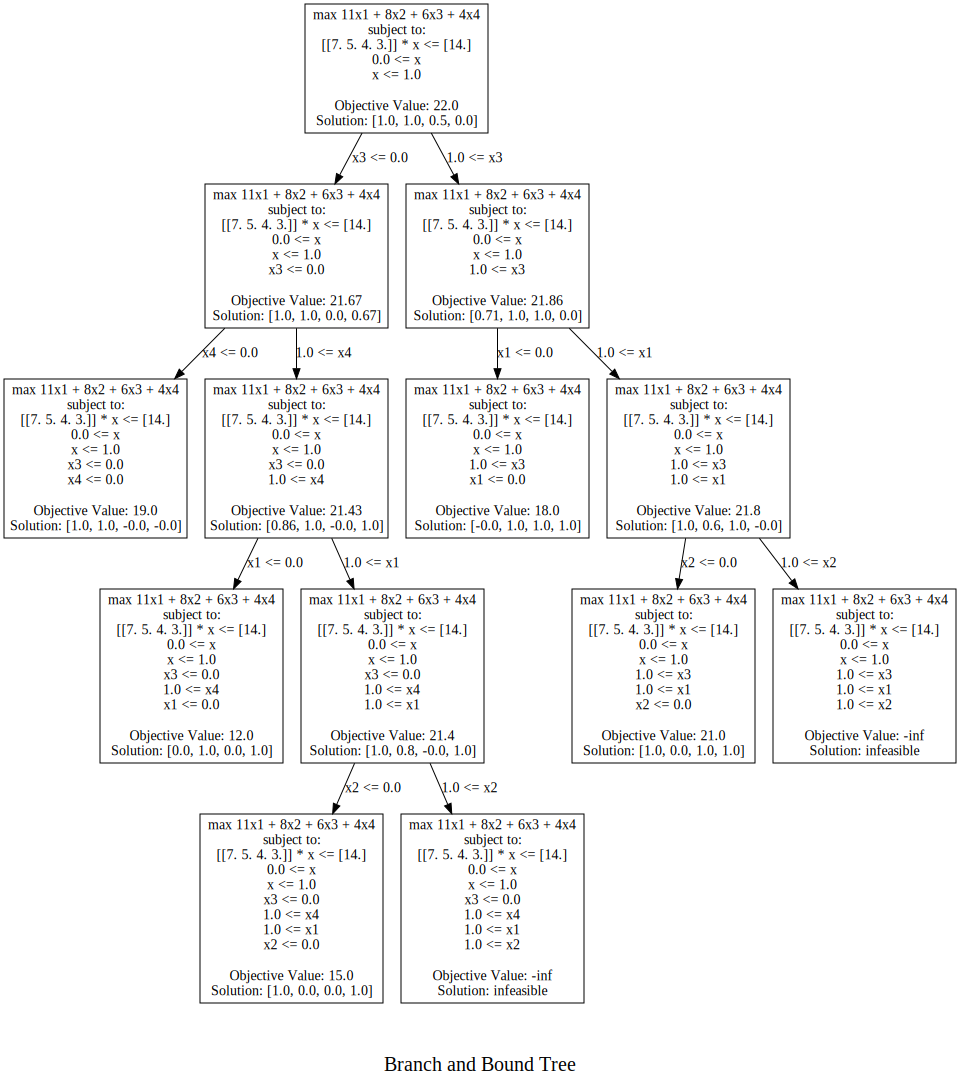

time: 447 ms


<IPython.core.display.Javascript object>

In [3]:
x = cp.Variable((4,), integer=False)
branch_and_bound_ilp(
    x=x,
    constraints=[np.array([[7, 5, 4, 3]]) @ x <= np.array([14]), x >= 0, x <= 1,],
    obj_coeff=np.array([11, 8, 6, 4]),
    problem_type="max",
)

In [4]:
# Sanity Check
x = cp.Variable((4,), integer=True)
constraints = [
    np.array([[7, 5, 4, 3]]) @ x <= np.array([14]),
    x >= 0,
    x <= 1,
]
obj = cp.Maximize(np.array([11, 8, 6, 4]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 21.0
The optimal solution is: x = [1.0, 0.0, 1.0, 1.0]
time: 10.4 ms


<IPython.core.display.Javascript object>

---

- Solve the following two integer programs by the branch-and-bound algorithm:


1. 

\begin{align}
    \underset{x \geq 0 \text{ integer }}{\text{maximize }}\qquad&2x_1 + x_2 \\
    \text{subject to }\qquad&x_1 + x_2 \leq 5 \\
    &x_2 - x_1 \leq 0 \\
    \text{and }\qquad&6x_1 + 2x_2 \leq 21. \\
\end{align}

Optimal Objective Value: 7.0 | Integer Solution: [3. 1.]


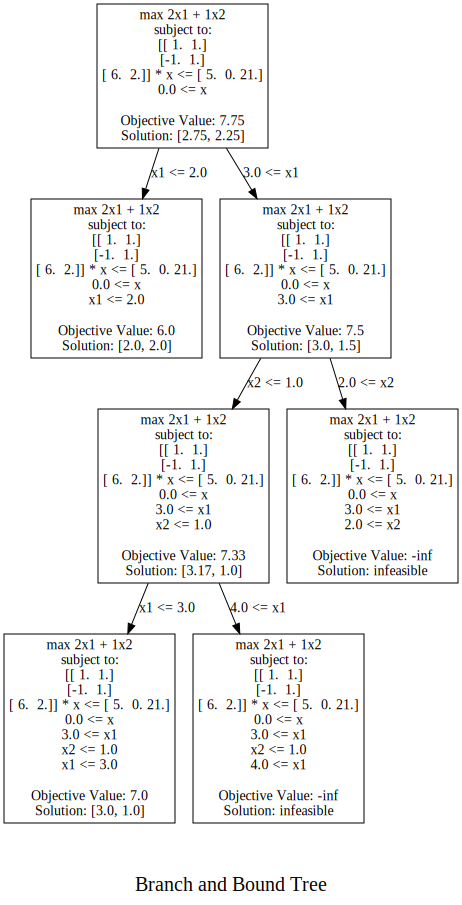

time: 375 ms


<IPython.core.display.Javascript object>

In [5]:
x = cp.Variable((2,), integer=False)
branch_and_bound_ilp(
    x=x,
    constraints=[
        np.array([[1, 1], [-1, 1], [6, 2]]) @ x <= np.array([5, 0, 21]),
        x >= 0,
    ],
    obj_coeff=np.array([2, 1]),
    problem_type="max",
)

In [6]:
# Sanity Check
x = cp.Variable((2,), integer=True)
constraints = [
    np.array([[1, 1], [-1, 1], [6, 2]]) @ x <= np.array([5, 0, 21]),
    x >= 0,
]
obj = cp.Maximize(np.array([2, 1]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 7.0
The optimal solution is: x = [3.0, 1.0]
time: 9.45 ms


<IPython.core.display.Javascript object>

2. 

\begin{align}
    \underset{x \geq 0 \text{ integer }}{\text{maximize }}\qquad&2x_1 + x_2 + 4x_3 + 5x_4 \\
    \text{subject to }\qquad&x_1 + 3x_2 + 2x_3 + 5x_4 \leq 10 \\
    \text{and }\qquad&3x_1 - x_2 - 5x_3 + 10x_4 \leq -4. \\
\end{align}

Optimal Objective Value: 20.0 | Integer Solution: [2. 0. 4. 0.]


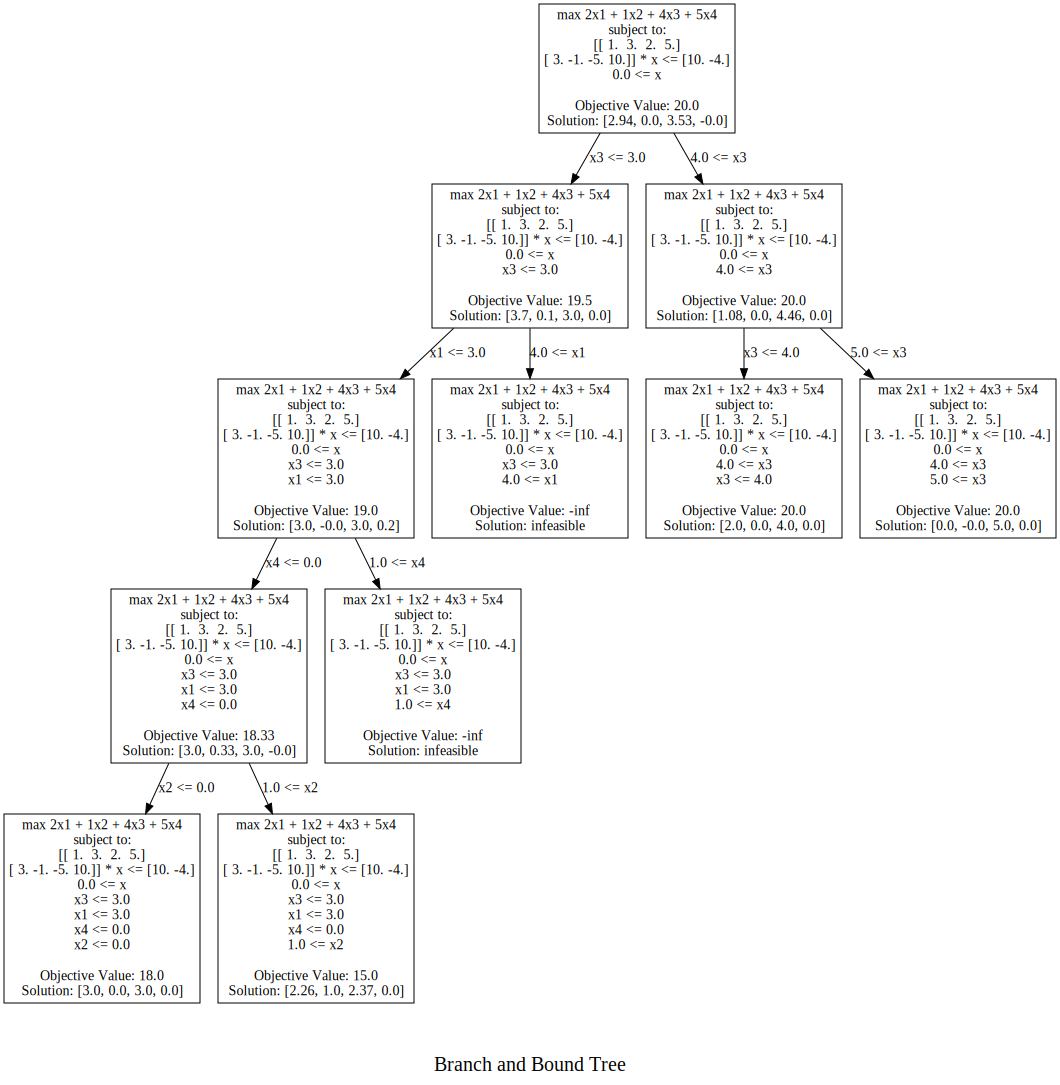

time: 419 ms


<IPython.core.display.Javascript object>

In [7]:
x = cp.Variable((4,), integer=False)
branch_and_bound_ilp(
    x=x,
    constraints=[
        np.array([[1, 3, 2, 5], [3, -1, -5, 10]]) @ x <= np.array([10, -4]),
        x >= 0,
    ],
    obj_coeff=np.array([2, 1, 4, 5]),
    problem_type="max",
)

In [8]:
# Sanity Check
x = cp.Variable((4,), integer=True)
constraints = [
    np.array([[1, 3, 2, 5], [3, -1, -5, 10]]) @ x <= np.array([10, -4]),
    x >= 0,
]
obj = cp.Maximize(np.array([2, 1, 4, 5]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 20.0
The optimal solution is: x = [0.0, 0.0, 5.0, 0.0]
time: 9.07 ms


<IPython.core.display.Javascript object>

---

- Consider the integer programming problem:

\begin{align}
    \underset{x}{\text{maximize }}\qquad&x_1 + x_2 \\
    \text{subject to }\qquad&-3x_1 + 4x_2 \leq 4 \\
    &3x_1 + 2x_2 \leq 11 \\
    &2x_1 - x_2 \leq 5 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

Use a figure to answer the following questions.

In [9]:
# Sanity Check
x = cp.Variable((2,), integer=True)
constraints = [
    np.array([[-3, 4], [3, 2], [2, -1]]) @ x <= np.array([4, 11, 5]),
    x >= 0,
]
obj = cp.Maximize(np.array([1, 1]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 4.0
The optimal solution is: x = [2.0, 2.0]
time: 7.59 ms


<IPython.core.display.Javascript object>

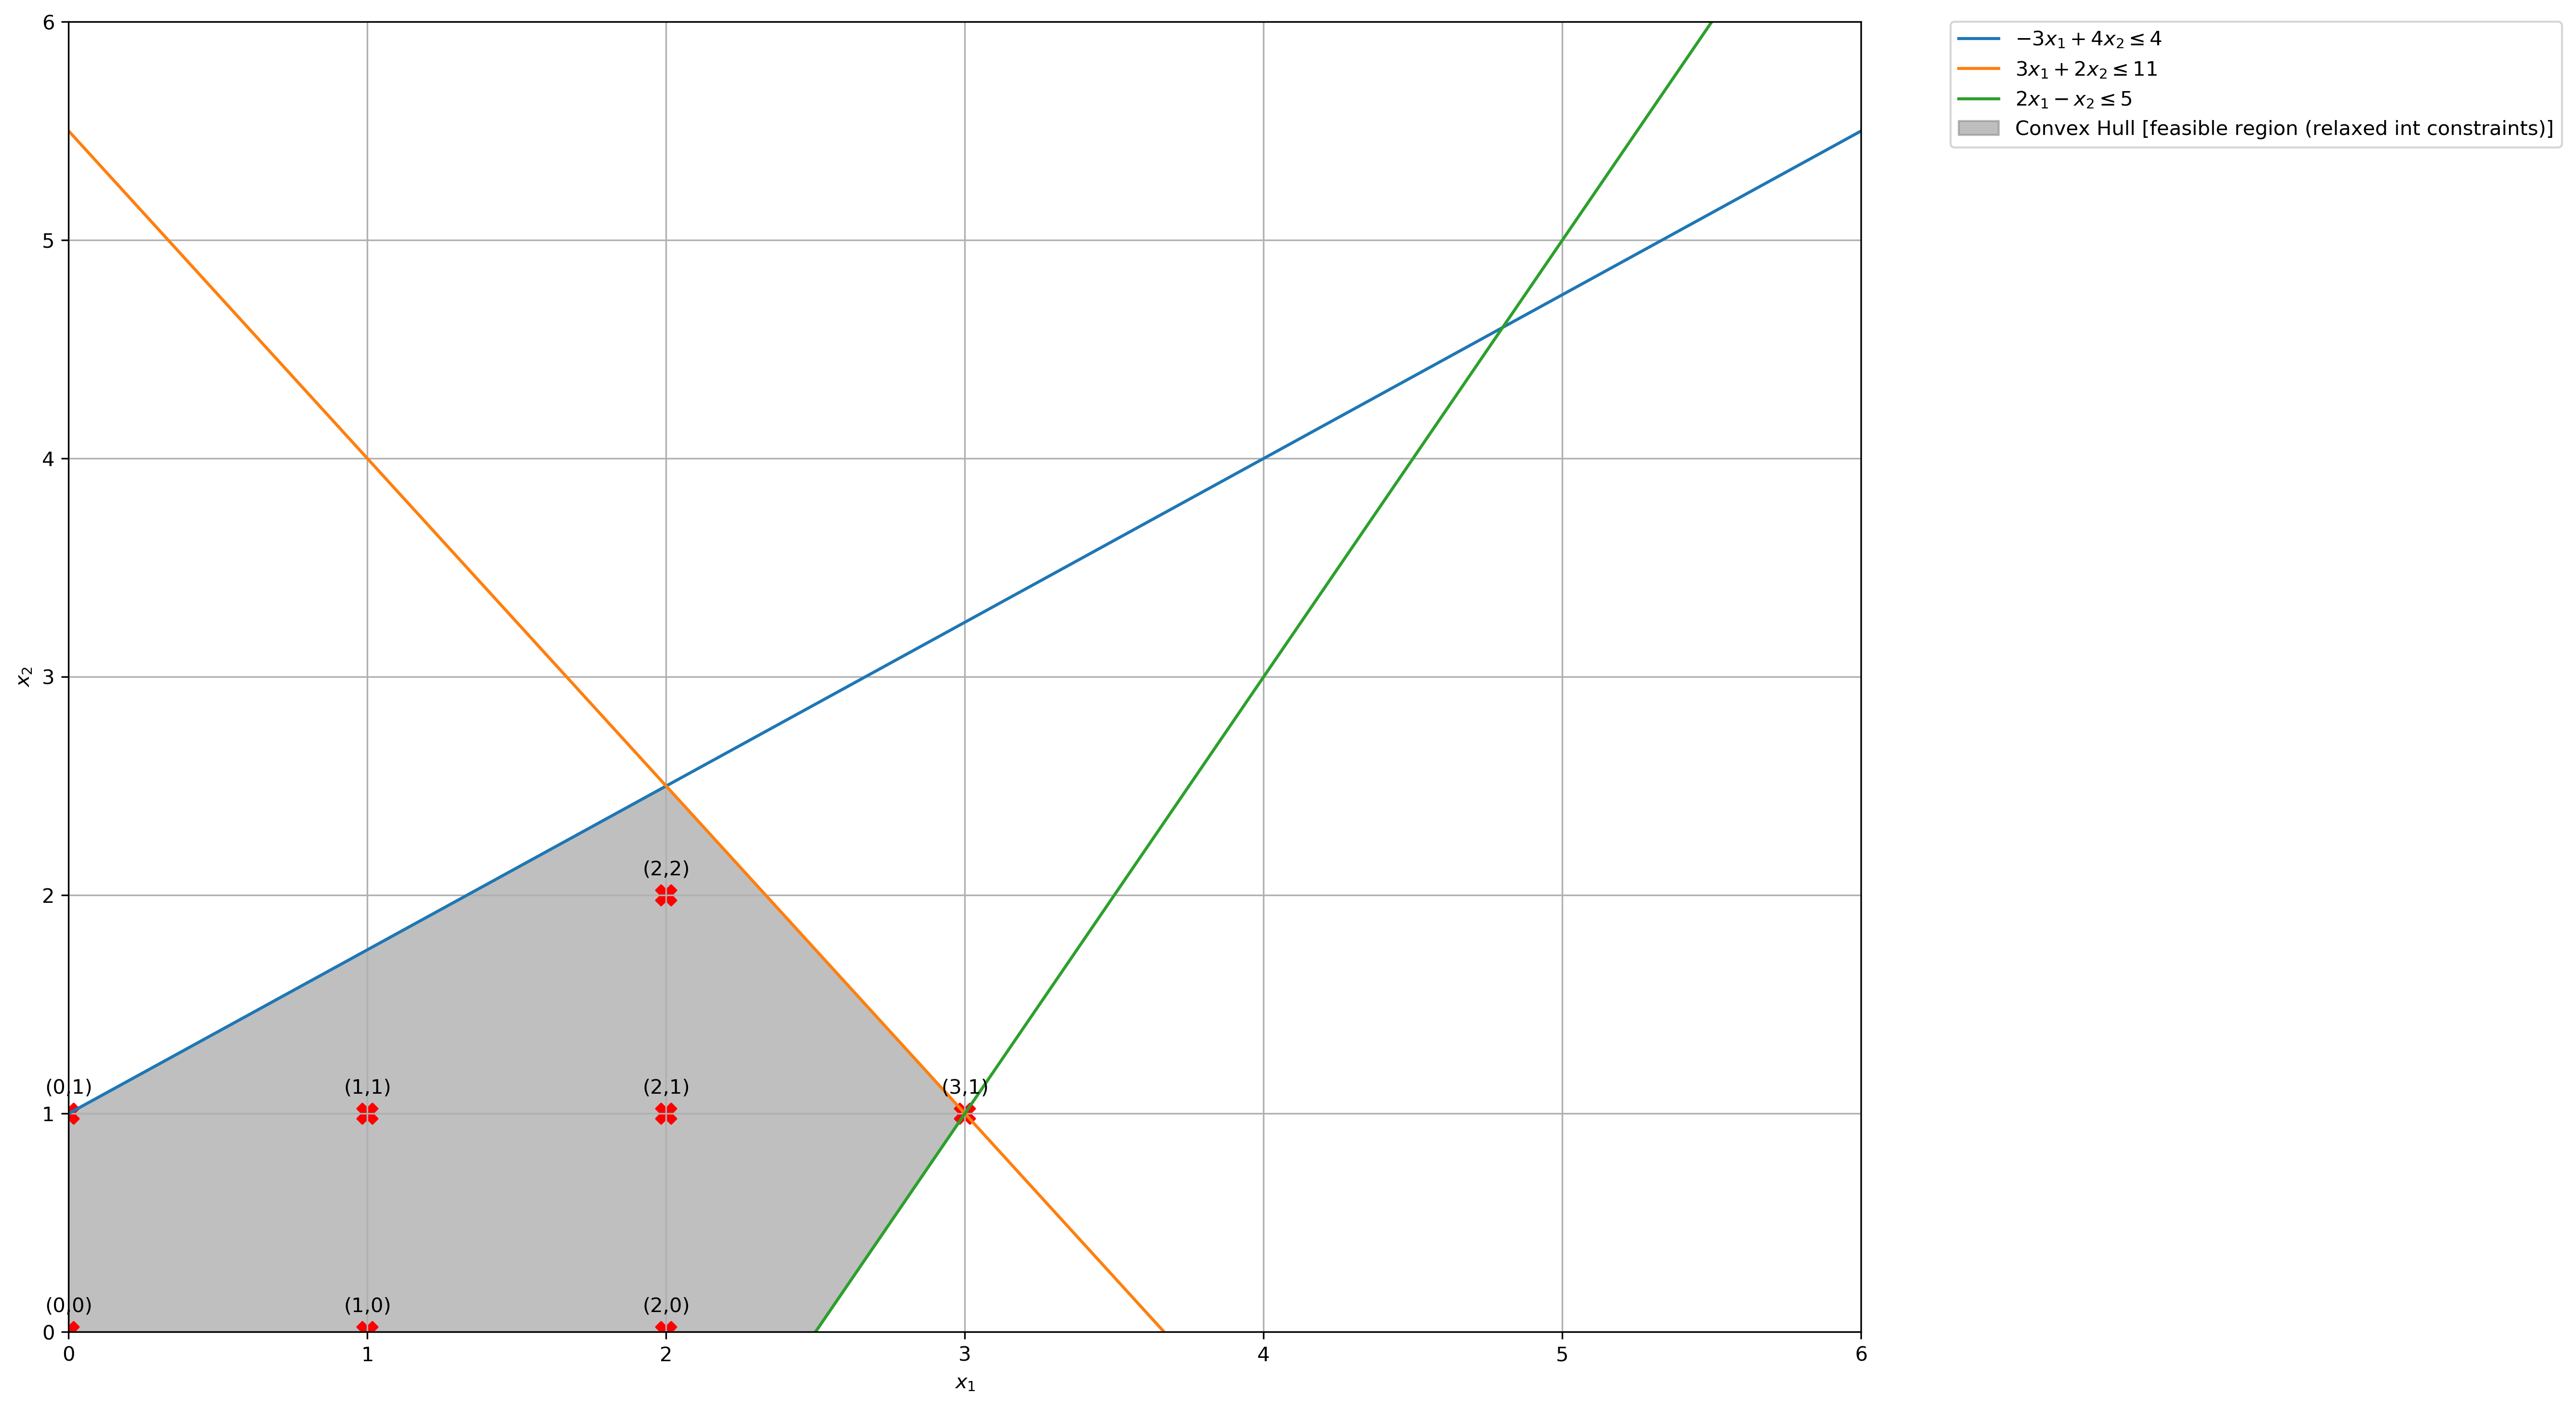

time: 1.86 s


<IPython.core.display.Javascript object>

In [10]:
# Construct lines
x1 = np.linspace(0, 6, 2000)  # x_1 >= 0
x2_1 = lambda x1: (3 * x1 + 4) / 4  # constraint 1: −3𝑥1+4𝑥2≤4
x2_2 = lambda x1: (-3 * x1 + 11) / 2  # constraint 2: 3𝑥1+2𝑥2≤11
x2_3 = lambda x1: 2 * x1 - 5  # constraint 3: 2𝑥1−𝑥2≤5

# Make plot
plt.plot(x1, x2_1(x1), label=r"$-3x_1 + 4x_2 \leq 4$")
plt.plot(x1, x2_2(x1), label=r"$3x_1 + 2x_2 \leq 11$")
plt.plot(x1, x2_3(x1), label=r"$2x_1 - x_2 \leq 5$")
plt.xlim((0, 6))
plt.ylim((0, 6))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region when Integer constraints are relaxed
ub = np.minimum(x2_1(x1), x2_2(x1))
lb = np.maximum(np.zeros(len(x1)), x2_3(x1))
plt.fill_between(
    x1,
    lb,
    ub,
    where=ub > lb,
    color="grey",
    alpha=0.5,
    label="Convex Hull [feasible region (relaxed int constraints)]",
)

# Get Feasible Integer Points
feasible = lambda x: np.alltrue(
    [
        np.alltrue(np.array([[-3, 4], [3, 2], [2, -1]]) @ x <= np.array([4, 11, 5])),
        np.alltrue(x >= 0),
    ]
)
feasible_integer_points = [
    (i, j) for i in range(6) for j in range(6) if feasible(np.array([i, j]))
]
plt.scatter(*list(zip(*feasible_integer_points)), marker="X", c="r", s=100)
for x, y in feasible_integer_points:
    label = f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

(a) What is the optimal objective value of the linear programming relaxation? What is the optimal objective value of the integer program?

In [11]:
# Sanity Check
x = cp.Variable((2,), integer=False)
constraints = [
    np.array([[-3, 4], [3, 2], [2, -1]]) @ x <= np.array([4, 11, 5]),
    x >= 0,
]
obj = cp.Maximize(np.array([1, 1]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 4.5
The optimal solution is: x = [2.0, 2.5]
time: 10.4 ms


<IPython.core.display.Javascript object>

In [12]:
print(
    "Optimal Objective value of Integer Program: ",
    max([np.array([1, 1]) @ np.array([x1, x2]) for x1, x2 in feasible_integer_points]),
)
feasible_integer_points[
    np.argmax(
        [np.array([1, 1]) @ np.array([x1, x2]) for x1, x2 in feasible_integer_points]
    )
]

Optimal Objective value of Integer Program:  4


(2, 2)

time: 3.23 ms


<IPython.core.display.Javascript object>

(b) What is the convex hull of the set of all feasible solution to the integer program?

In [13]:
print(
    f"Integer points in Convex Hull of the set of all feasible solution to the integer program: {feasible_integer_points}"
)

Integer points in Convex Hull of the set of all feasible solution to the integer program: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 1)]
time: 447 µs


<IPython.core.display.Javascript object>

(c) Construct a Gomory cutting plane using the optimal linear programming solution.

\begin{align}
    \underset{x}{\text{maximize }}\qquad&x_1 + x_2 \\
    \text{subject to }\qquad&-3x_1 + 4x_2 \leq 4 \\
    &3x_1 + 2x_2 \leq 11 \\
    &2x_1 - x_2 \leq 5 \\
    \text{and }\qquad&x_1, x_2 \geq 0. \\
\end{align}

In [14]:
A = np.array([[-3, 4, 1, 0, 0], [3, 2, 0, 1, 0], [2, -1, 0, 0, 1]])
b = np.array([4, 11, 5])
c = np.array([1, 1, 0, 0, 0])
x = cp.Variable((5,), integer=False)
constraints = [
    A @ x == b,
    x >= 0,
]
obj = cp.Maximize(c.T @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 4.5
The optimal solution is: x = [2.0, 2.5, 0.0, -0.0, 3.5]
time: 10.1 ms


<IPython.core.display.Javascript object>

In [15]:
basic_idxs = [0, 1, 4]
non_basic_idxs = [2, 3]

time: 507 µs


<IPython.core.display.Javascript object>

${c_B}^\top B^{-1} N - c_N$

In [16]:
(c[basic_idxs].T @ np.linalg.inv(A[:, basic_idxs]) @ A[:, non_basic_idxs]) - c[
    non_basic_idxs
]

array([0.05555556, 0.38888889])

time: 2.7 ms


<IPython.core.display.Javascript object>

Since the negative reduced cost coefficients are >= 0 for maximization problem, solution is optimal.

$B^{-1}N$

In [17]:
(np.linalg.inv(A[:, basic_idxs]) @ A[:, non_basic_idxs])

array([[-0.11111111,  0.22222222],
       [ 0.16666667,  0.16666667],
       [ 0.38888889, -0.27777778]])

time: 2.59 ms


<IPython.core.display.Javascript object>

$B^{-1}b$

In [18]:
np.linalg.inv(A[:, basic_idxs]) @ b

array([2. , 2.5, 3.5])

time: 2.25 ms


<IPython.core.display.Javascript object>

${c_B}^\top  B^{-1}b$

In [19]:
c[basic_idxs].T @ np.linalg.inv(A[:, basic_idxs]) @ b

4.499999999999999

time: 2.56 ms


<IPython.core.display.Javascript object>

Optimal Solution Simplex Tableau:

\begin{align}
    &\begin{array}{c}
    \\
    z \\ 
    x_1 \\
    x_2 \\
    s_3 \\
    \end{array}
    \begin{bmatrix}
    \begin{array}{c|ccccc|c}
      z & x_1 & x_2 & s_1 & s_2 & s_3 & b \\ \hline
      4.5 & 0 & 0 & 0.05555556 & 0.38888889 & 0 & - \\ \hline
      0 & 1 & 0 & -0.11111111 & 0.22222222 & 0 & 2 \\
      0 & 0 & 1 & 0.16666667 & 0.16666667 & 0 & 2.5 \\
      0 & 0 & 0 & 0.38888889 & -0.27777778 & 1 & 3.5 \\
    \end{array}
    \end{bmatrix} \\
\end{align}

From the 2nd row:

\begin{align}
    x_2 + 0.16666667s_1 + 0.16666667s_2 &= 2.5 \\
    0.16666667s_1 + 0.16666667s_2 + 0.5 &= 3 - x_2 \\
\end{align}

LHS is always $\geq 0$ since $s_1$ and $s_2$ are non-negative, hence, we add a new constraint (Gomory Cutting plane):

\begin{align}
    0.16666667s_1 + 0.16666667s_2 &\geq 0.5 \\
\end{align}

In [20]:
A = np.array(
    [
        [-3, 4, 1, 0, 0, 0],
        [3, 2, 0, 1, 0, 0],
        [2, -1, 0, 0, 1, 0],
        [0, 0, *-(np.linalg.inv(A[:, basic_idxs]) @ A[:, non_basic_idxs])[1], 0, 1],
    ]
)
b = np.array([4, 11, 5, -0.5])
c = np.array([1, 1, 0, 0, 0, 0])
x = cp.Variable((6,), integer=False)
constraints = [
    A @ x == b,
    x >= 0,
]
obj = cp.Maximize(c.T @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 4.33
The optimal solution is: x = [2.33, 2.0, 3.0, 0.0, 2.33, -0.0]
time: 11.6 ms


<IPython.core.display.Javascript object>

(d) Starting with the optimal linear programming solution, solve the integer program using the branch-and-bound method.

Optimal Objective Value: 4.0 | Integer Solution: [2. 2.]


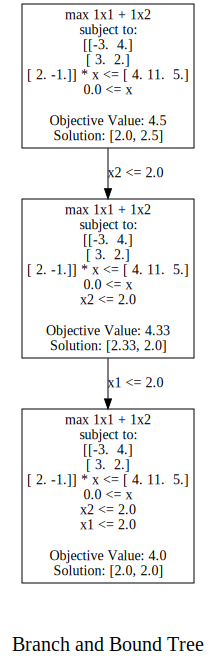

time: 389 ms


<IPython.core.display.Javascript object>

In [21]:
x = cp.Variable((2,), integer=False)
branch_and_bound_ilp(
    x=x,
    constraints=[
        np.array([[-3, 4], [3, 2], [2, -1]]) @ x <= np.array([4, 11, 5]),
        x >= 0,
    ],
    obj_coeff=np.array([1, 1]),
    problem_type="max",
)

(e) Suppose you relax the first constraint. What is the optimal value $Z_{\text{dual}}$ of the Lagrangian dual?

\begin{align}
    d(\lambda) = \underset{x}{\text{minimize }}\qquad&-x_1 - x_2 + \lambda(-3x_1 + 4x_2 - 4) \\
    \text{subject to }\qquad&3x_1 + 2x_2 - 11 \leq 0 \\
    &2x_1 - x_2 - 5 \leq 0 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

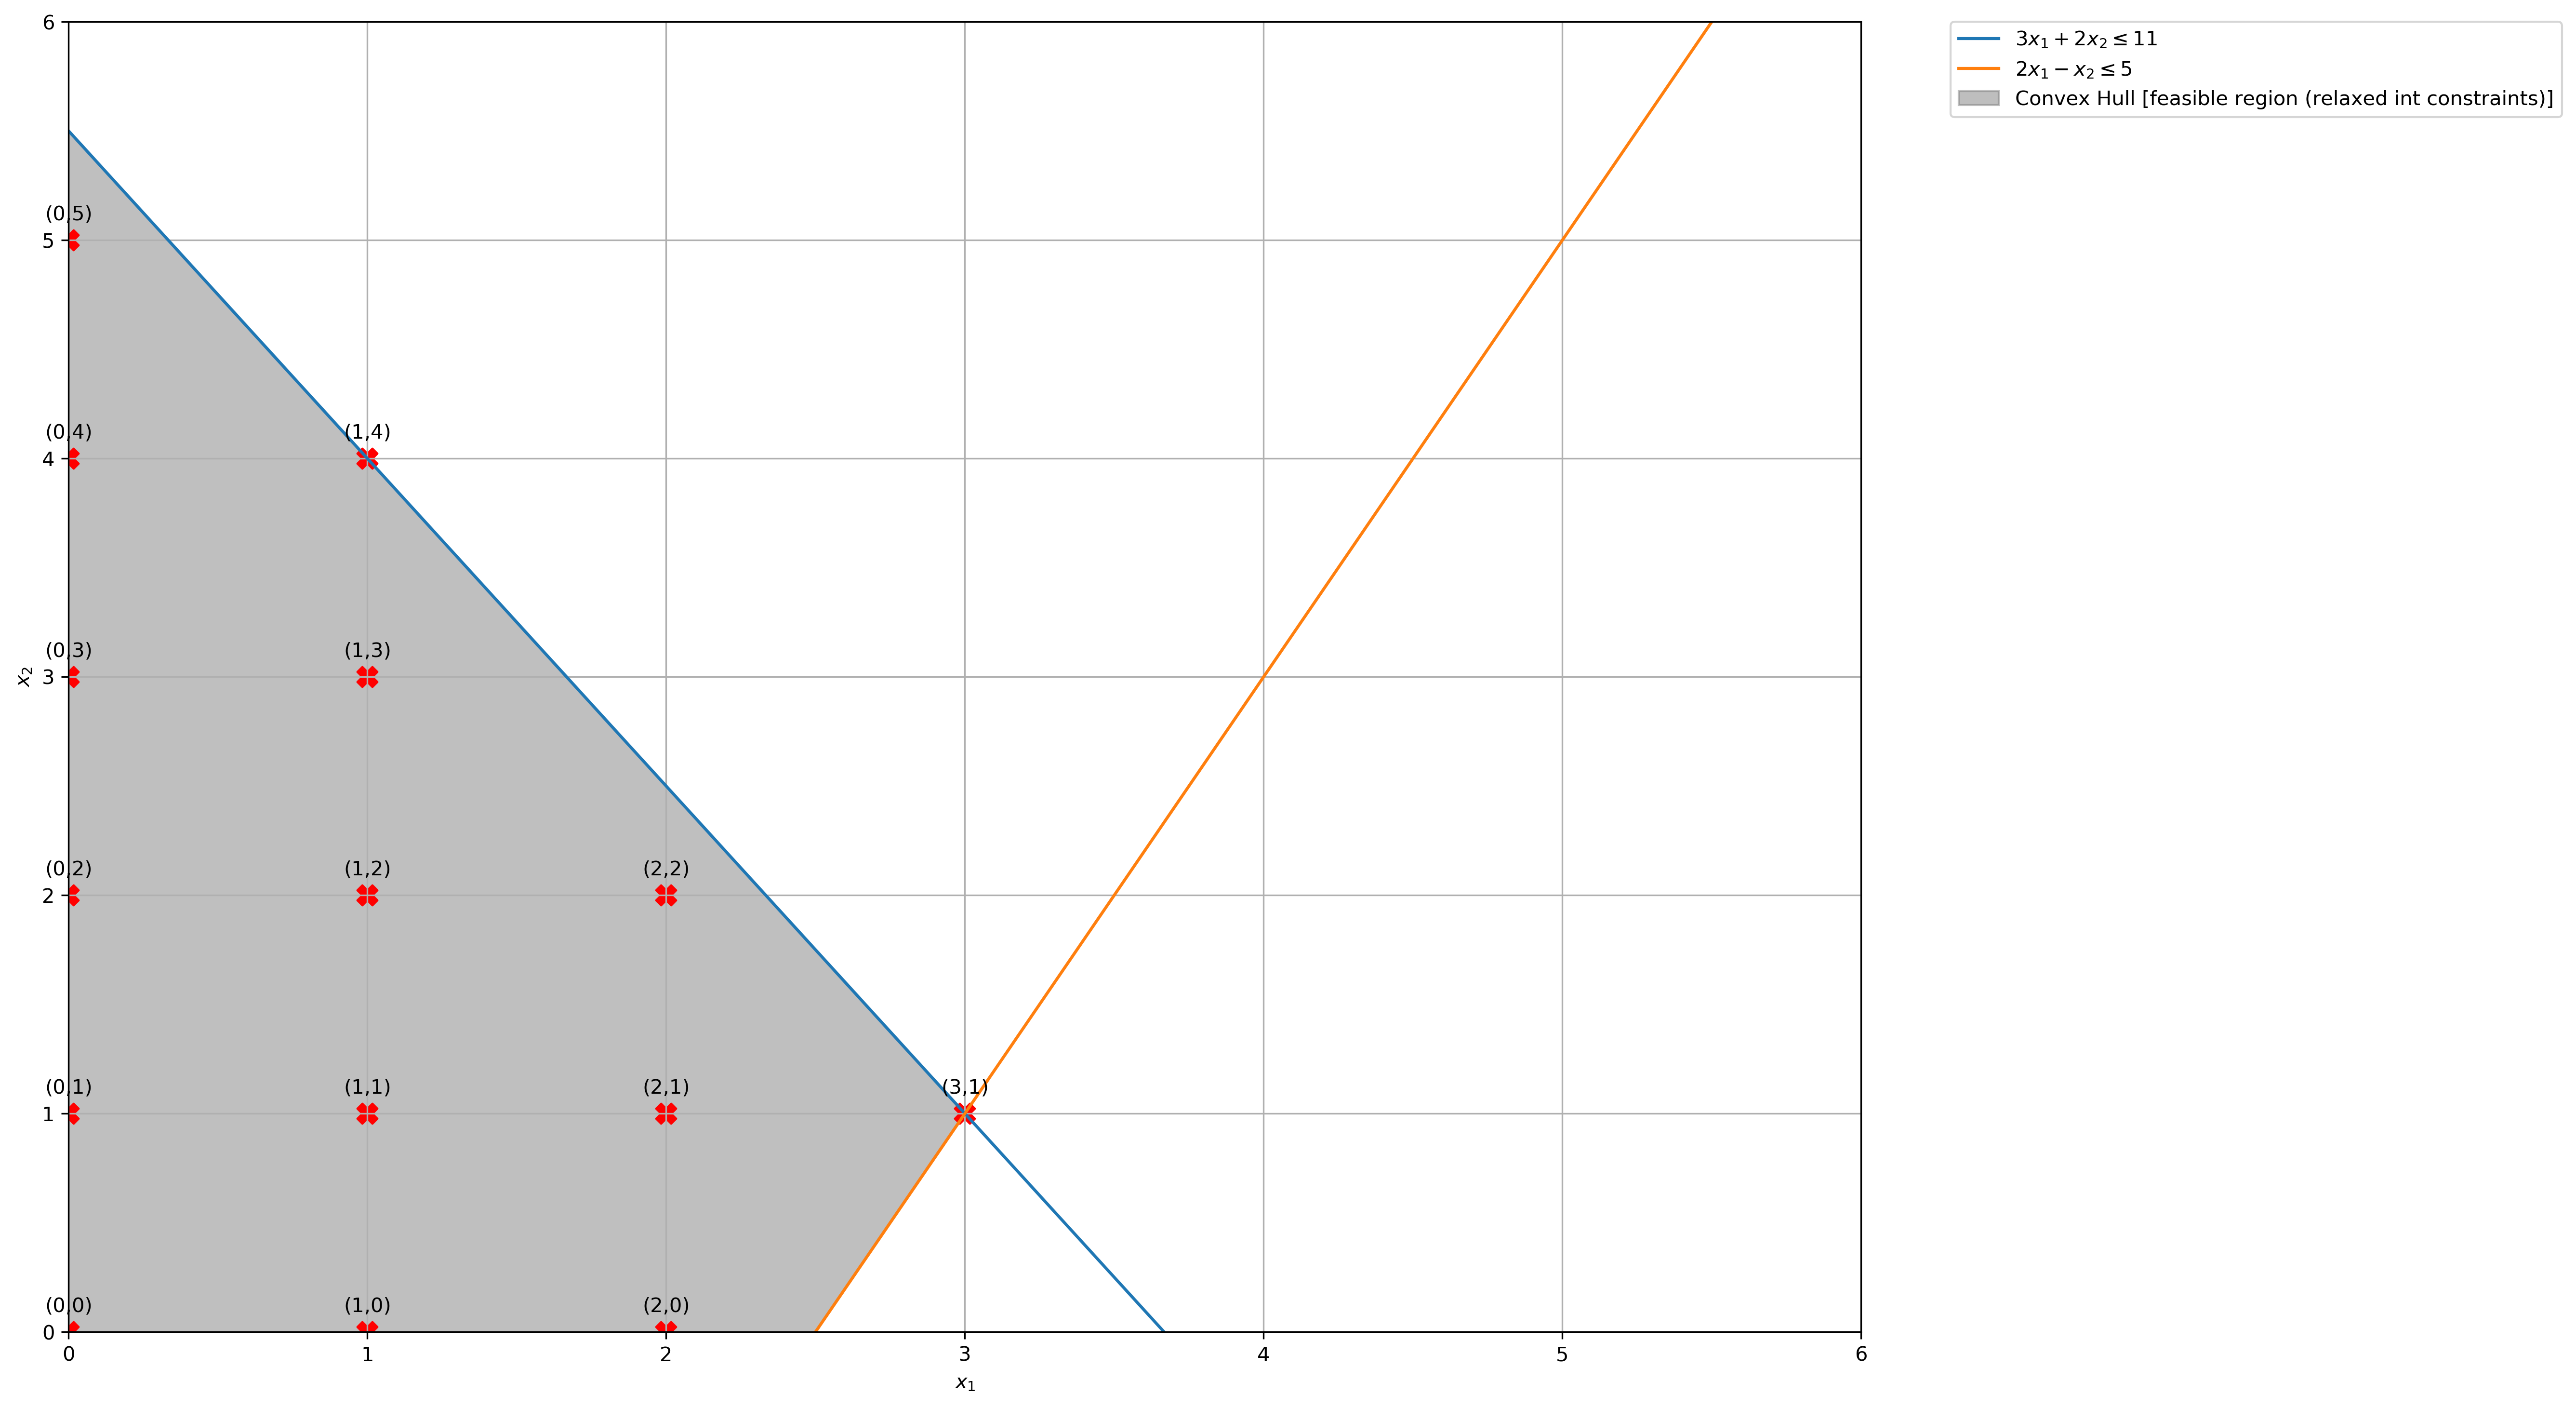

time: 1.63 s


<IPython.core.display.Javascript object>

In [22]:
# Construct lines
x1 = np.linspace(0, 6, 2000)  # x_1 >= 0
x2_2 = lambda x1: (-3 * x1 + 11) / 2  # constraint 2: 3𝑥1+2𝑥2≤11
x2_3 = lambda x1: 2 * x1 - 5  # constraint 3: 2𝑥1−𝑥2≤5

# Make plot
plt.plot(x1, x2_2(x1), label=r"$3x_1 + 2x_2 \leq 11$")
plt.plot(x1, x2_3(x1), label=r"$2x_1 - x_2 \leq 5$")
plt.xlim((0, 6))
plt.ylim((0, 6))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region when Integer constraints are relaxed
ub = x2_2(x1)
lb = np.maximum(np.zeros(len(x1)), x2_3(x1))
plt.fill_between(
    x1,
    lb,
    ub,
    where=ub > lb,
    color="grey",
    alpha=0.5,
    label="Convex Hull [feasible region (relaxed int constraints)]",
)

# Get Feasible Integer Points
feasible = lambda x: np.alltrue(
    [
        np.alltrue(np.array([[3, 2], [2, -1]]) @ x <= np.array([11, 5])),
        np.alltrue(x >= 0),
    ]
)
feasible_integer_points = [
    (i, j) for i in range(6) for j in range(6) if feasible(np.array([i, j]))
]
plt.scatter(*list(zip(*feasible_integer_points)), marker="X", c="r", s=100)
for x, y in feasible_integer_points:
    label = f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [23]:
print(
    f"Integer points in Convex Hull X_hat of Dual Function: {feasible_integer_points}"
)

Integer points in Convex Hull X_hat of Dual Function: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (3, 1)]
time: 364 µs


<IPython.core.display.Javascript object>

In [24]:
expr = lambda x1, x2: -x1 - x2 + symbols("λ") * (-3 * x1 + 4 * x2 - 4)
[expr(x1, x2) for x1, x2 in feasible_integer_points]

[-4*λ,
 -1,
 4*λ - 2,
 8*λ - 3,
 12*λ - 4,
 16*λ - 5,
 -7*λ - 1,
 -3*λ - 2,
 λ - 3,
 5*λ - 4,
 9*λ - 5,
 -10*λ - 2,
 -6*λ - 3,
 -2*λ - 4,
 -9*λ - 4]

time: 49.3 ms


<IPython.core.display.Javascript object>

\begin{align}
    d(\lambda) &= \underset{x\in\hat{X}}{\text{minimize }} -x_1 - x_2 + \lambda(-3x_1 + 4x_2 - 4) \\
    &= \min\{ 
    -4\lambda,
     -1,
     4\lambda - 2,
     8\lambda - 3,
     12\lambda - 4,
     16\lambda - 5,
     -7\lambda - 1,
     -3\lambda - 2,
     λ - 3,
     5\lambda - 4,
     9\lambda - 5,
     -10\lambda - 2,
     -6\lambda - 3,
     -2\lambda - 4,
     -9\lambda - 4  
     \}\\
\end{align}

In [25]:
t = cp.Variable((1,), integer=False)
λ = cp.Variable((1,), integer=False)
constraints = [
    *[
        t <= lambdify(symbols("λ"), expr(x1, x2), "numpy")(λ)
        for x1, x2 in feasible_integer_points
    ],
    λ >= 0,
]
obj = cp.Maximize(t)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Optimal Solution for Lagrangian Dual Relaxation")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value Z_dual is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: λ = {np.round(λ.value[0], 2)}")

Optimal Solution for Lagrangian Dual Relaxation
Status: optimal
The optimal value Z_dual is: -4.5
The optimal solution is: λ = 0.06
time: 36.8 ms


<IPython.core.display.Javascript object>

(f) Repeat part (e) by relaxing the third constraint.

\begin{align}
    d(\lambda) = \underset{x}{\text{minimize }}\qquad&-x_1 - x_2 + \lambda(2x_1 - x_2 - 5) \\
    \text{subject to }\qquad&-3x_1 + 4x_2 - 4 \leq 0 \\
    &3x_1 + 2x_2 - 11 \leq 0 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

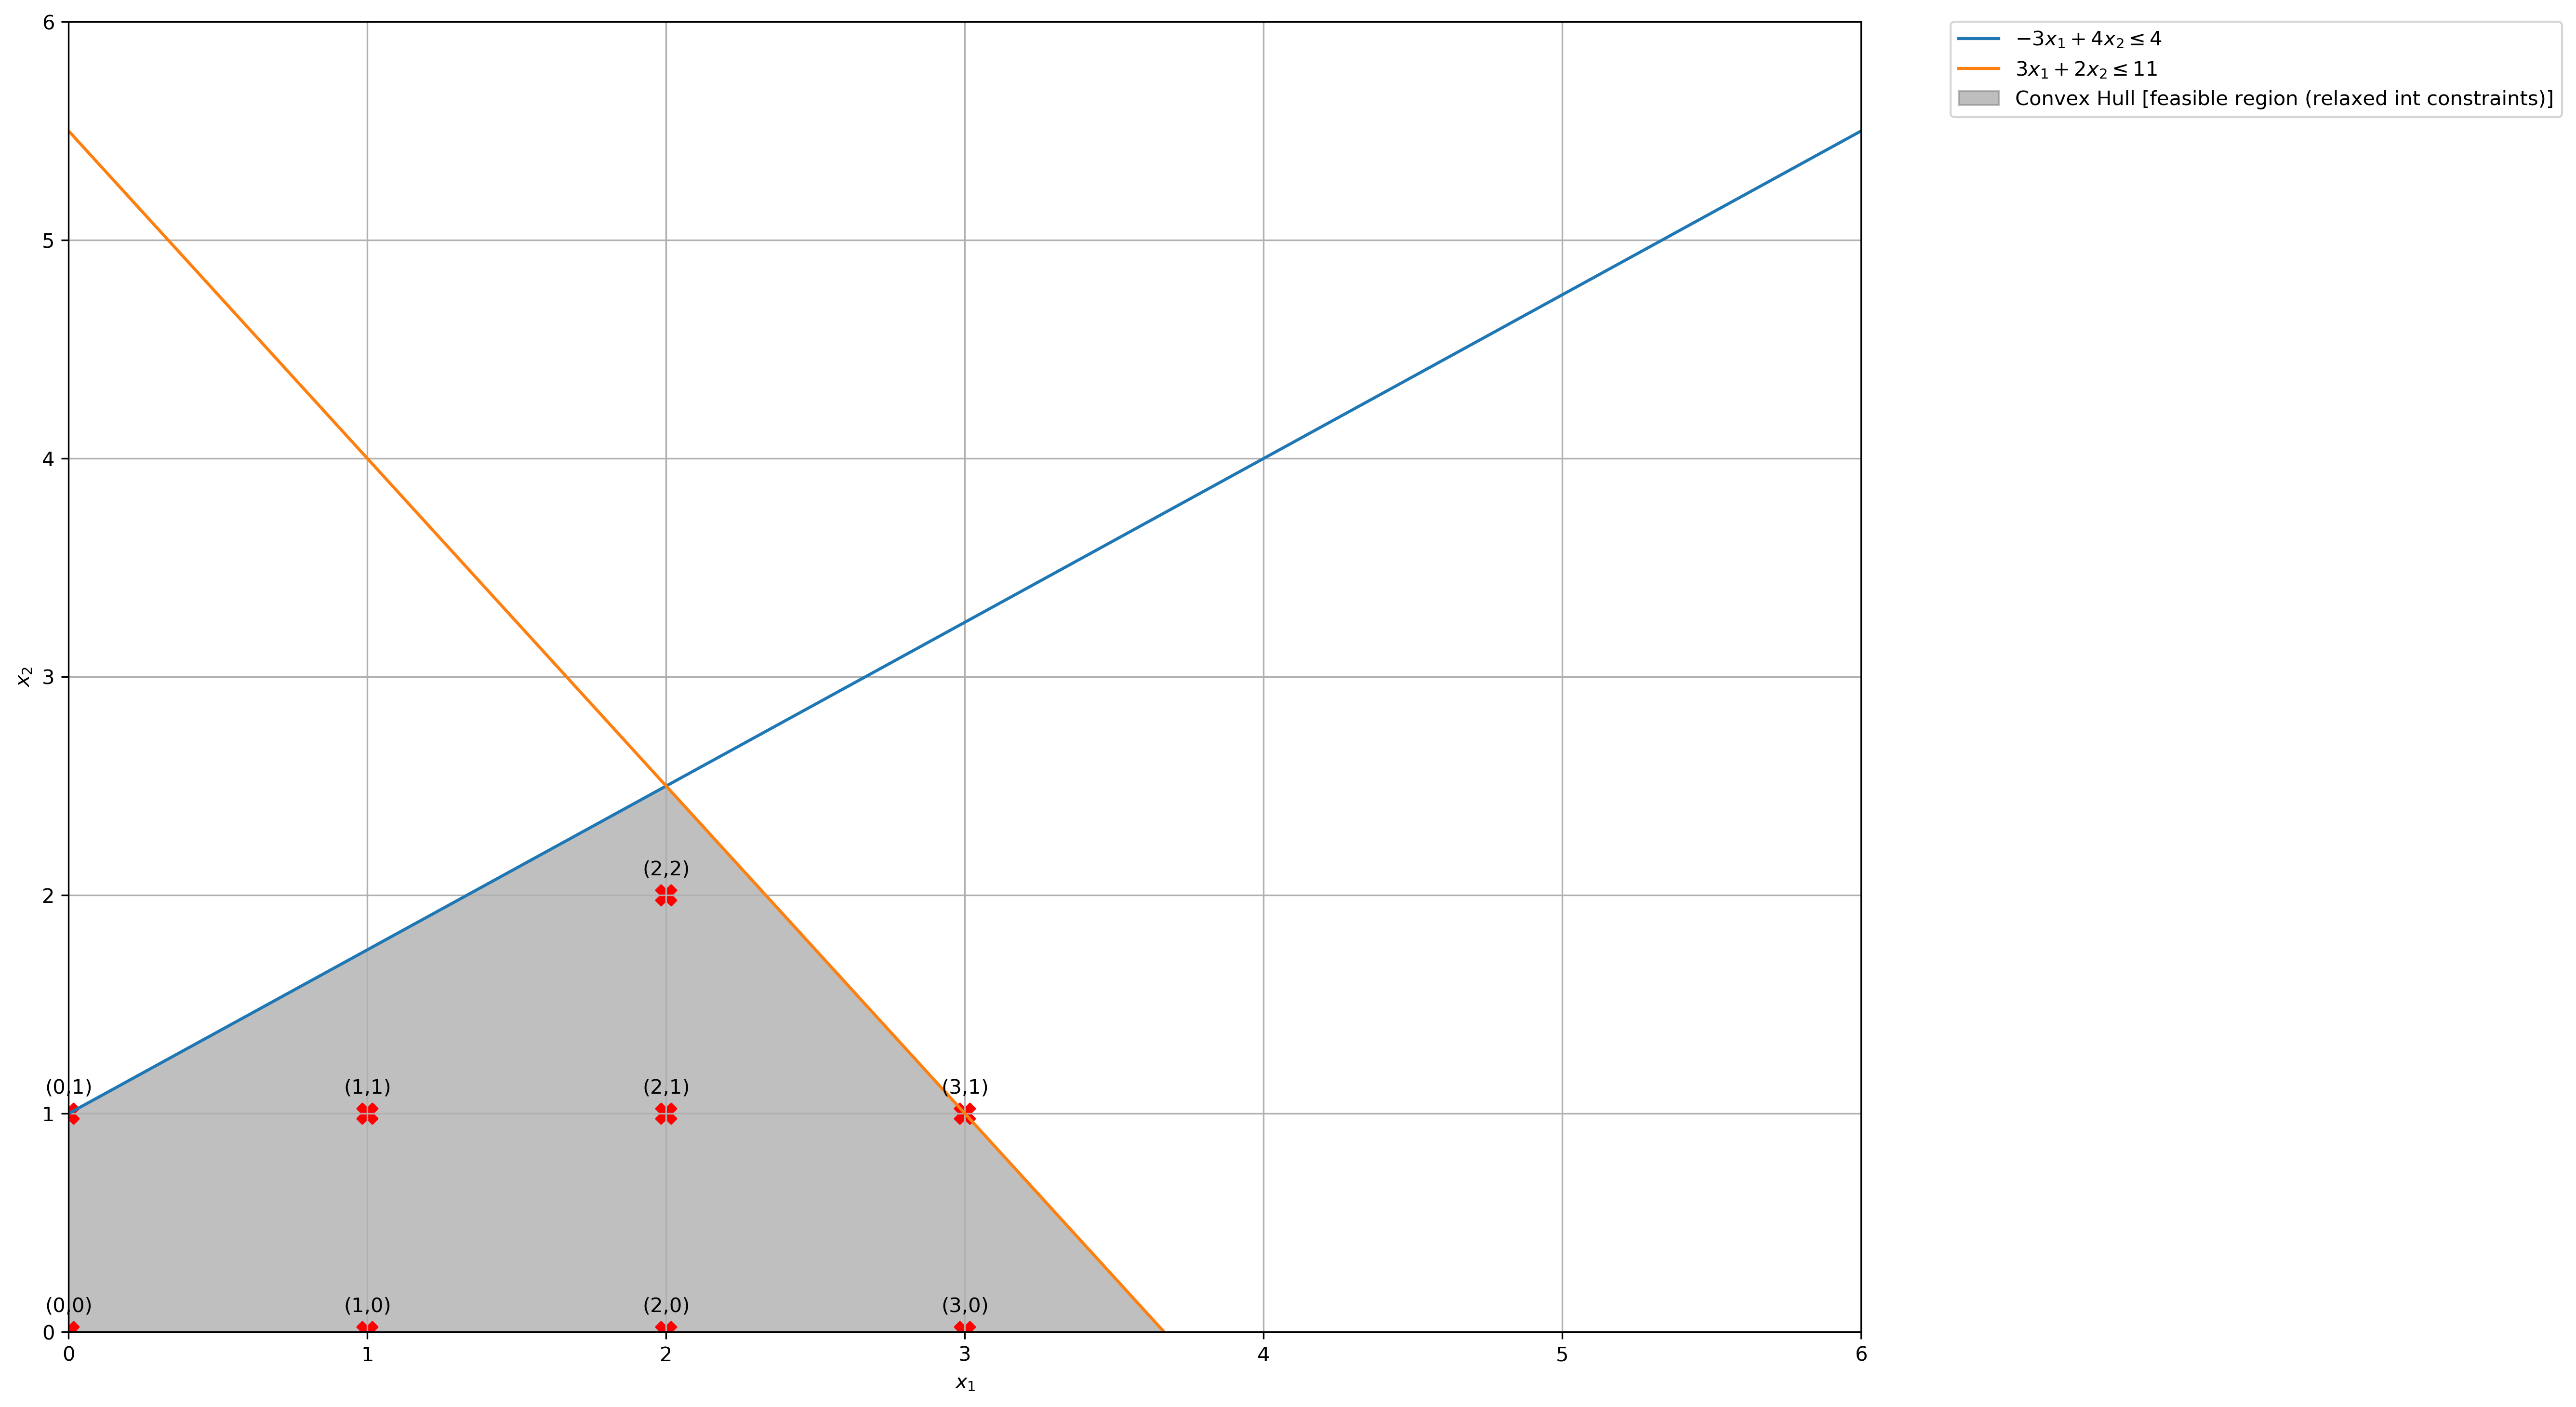

time: 1.64 s


<IPython.core.display.Javascript object>

In [26]:
# Construct lines
x1 = np.linspace(0, 6, 2000)  # x_1 >= 0
x2_1 = lambda x1: (3 * x1 + 4) / 4  # constraint 1: −3𝑥1+4𝑥2≤4
x2_2 = lambda x1: (-3 * x1 + 11) / 2  # constraint 2: 3𝑥1+2𝑥2≤11

# Make plot
plt.plot(x1, x2_1(x1), label=r"$-3x_1 + 4x_2 \leq 4$")
plt.plot(x1, x2_2(x1), label=r"$3x_1 + 2x_2 \leq 11$")
plt.xlim((0, 6))
plt.ylim((0, 6))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region when Integer constraints are relaxed
ub = np.minimum(x2_1(x1), x2_2(x1))
lb = np.zeros(len(x1))
plt.fill_between(
    x1,
    lb,
    ub,
    where=ub > lb,
    color="grey",
    alpha=0.5,
    label="Convex Hull [feasible region (relaxed int constraints)]",
)

# Get Feasible Integer Points
feasible = lambda x: np.alltrue(
    [
        np.alltrue(np.array([[-3, 4], [3, 2]]) @ x <= np.array([4, 11])),
        np.alltrue(x >= 0),
    ]
)
feasible_integer_points = [
    (i, j) for i in range(6) for j in range(6) if feasible(np.array([i, j]))
]
plt.scatter(*list(zip(*feasible_integer_points)), marker="X", c="r", s=100)
for x, y in feasible_integer_points:
    label = f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [27]:
print(
    f"Integer points in Convex Hull X_hat of Dual Function: {feasible_integer_points}"
)

Integer points in Convex Hull X_hat of Dual Function: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1)]
time: 367 µs


<IPython.core.display.Javascript object>

In [28]:
expr = lambda x1, x2: -x1 - x2 + symbols("λ") * (2 * x1 - x2 - 5)
[expr(x1, x2) for x1, x2 in feasible_integer_points]

[-5*λ, -6*λ - 1, -3*λ - 1, -4*λ - 2, -λ - 2, -2*λ - 3, -3*λ - 4, λ - 3, -4]

time: 3.95 ms


<IPython.core.display.Javascript object>

\begin{align}
    d(\lambda) &= \underset{x\in\hat{X}}{\text{minimize }} -x_1 - x_2 + \lambda(-3x_1 + 4x_2 - 4) \\
    &= \min\{ -5\lambda, -6\lambda - 1, -3\lambda - 1, -4\lambda - 2, -λ - 2, -2\lambda - 3, -3\lambda - 4, λ - 3, -4 \}\\
\end{align}

In [29]:
t = cp.Variable((1,), integer=False)
λ = cp.Variable((1,), integer=False)
constraints = [
    *[
        t <= lambdify(symbols("λ"), expr(x1, x2), "numpy")(λ)
        for x1, x2 in feasible_integer_points
    ],
    λ >= 0,
]
obj = cp.Maximize(t)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Optimal Solution for Lagrangian Dual Relaxation")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value Z_dual is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: λ = {np.round(λ.value[0], 2)}")

Optimal Solution for Lagrangian Dual Relaxation
Status: optimal
The optimal value Z_dual is: -4.0
The optimal solution is: λ = -0.0
time: 24.9 ms


<IPython.core.display.Javascript object>

---

- Consider the integer program:
\begin{align}
    \underset{x}{\text{maximize }}\qquad&x_1 + 2x_2 \\
    \text{subject to }\qquad&x_1 + x_2 \leq 5 \\
    &x_1 - 3x_2 \leq -4 \\
    &x_1 \geq 1 \\
    &x_1 - x_2 \leq 0 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

In [30]:
# Sanity Check
x = cp.Variable((2,), integer=True)
constraints = [
    np.array([[1, 1], [1, -3], [-1, 0], [1, -1]]) @ x <= np.array([5, -4, -1, 0]),
    x >= 0,
]
obj = cp.Maximize(np.array([1, 2]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 9.0
The optimal solution is: x = [1.0, 4.0]
time: 9.27 ms


<IPython.core.display.Javascript object>

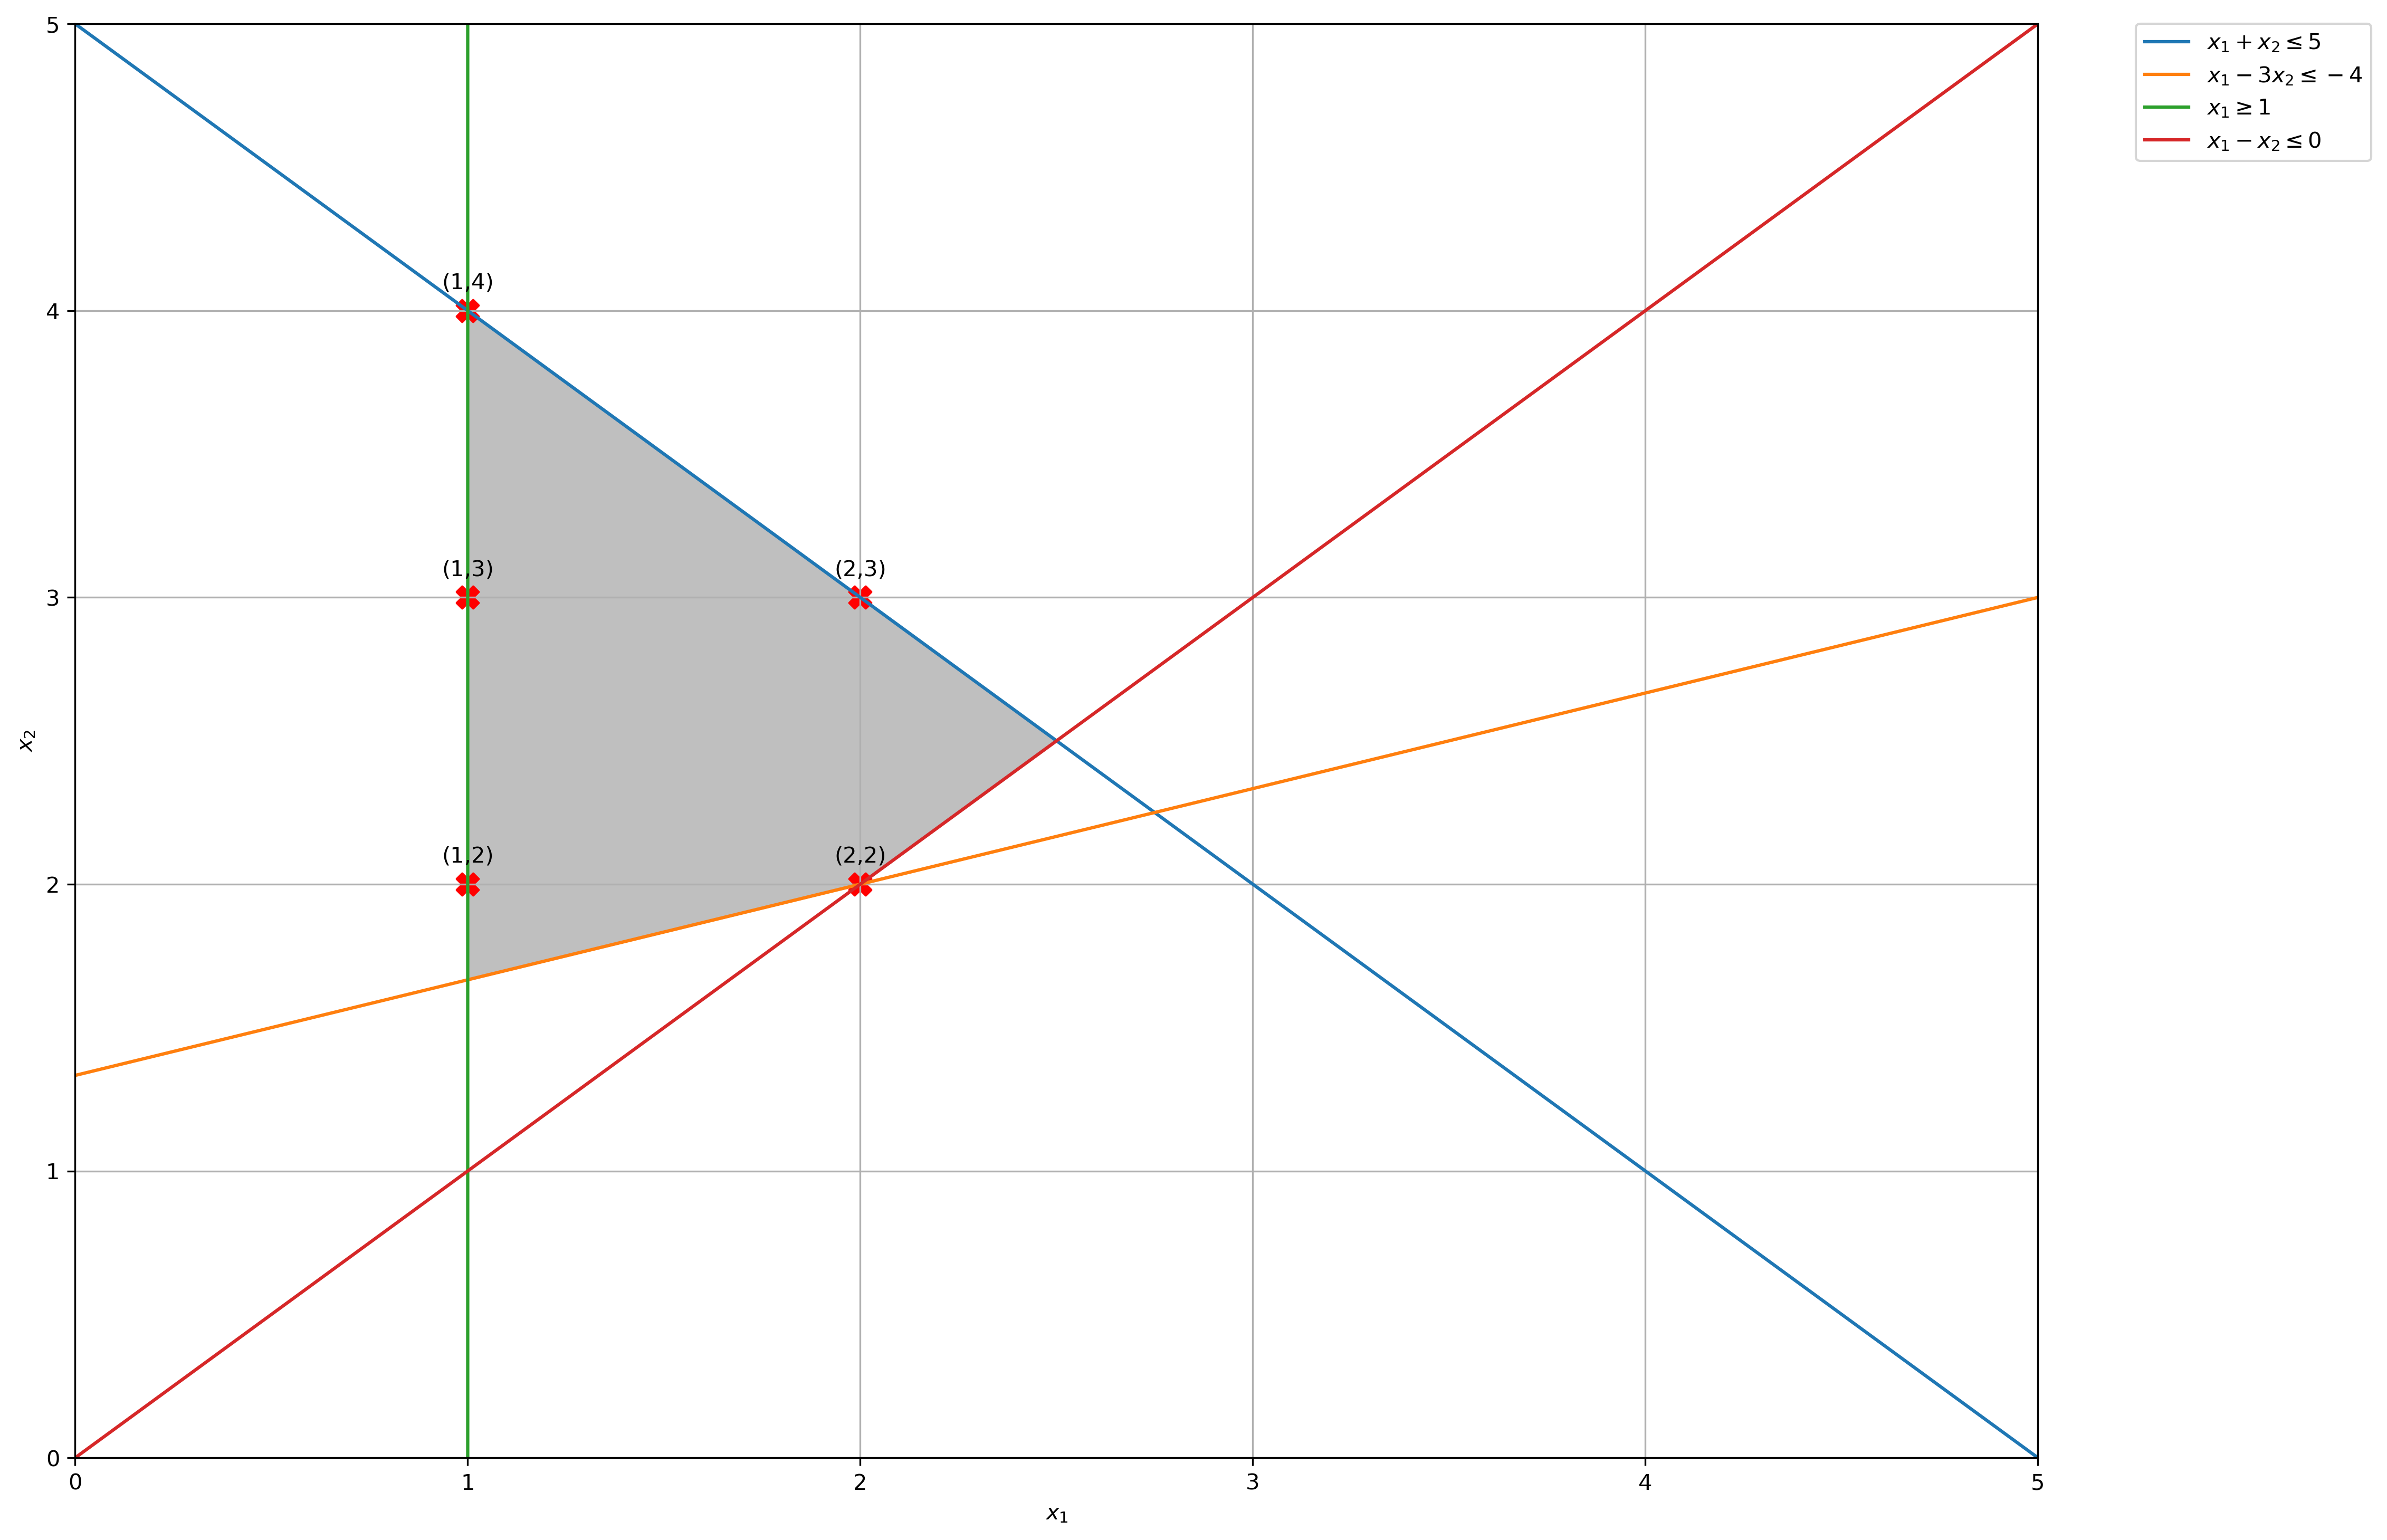

time: 1.55 s


<IPython.core.display.Javascript object>

In [31]:
# Construct lines
x1 = np.linspace(0, 5, 2000)  # x_1 >= 0
x2_1 = lambda x1: -x1 + 5  # constraint 1: 𝑥1+𝑥2≤5
x2_2 = lambda x1: (x1 + 4) / 3  # constraint 2: 𝑥1−3𝑥2≤−4
x2_3 = lambda x1: [1] * len(x1)  # constraint 3: x_1 >= 1
x2_4 = lambda x1: x1  # constraint 4: 𝑥1−𝑥2≤0

# Make plot
plt.plot(x1, x2_1(x1), label=r"$x_1 + x_2 \leq 5$")
plt.plot(x1, x2_2(x1), label=r"$x_1 - 3x_2 \leq -4$")
plt.plot([1] * len(x1), x1, label=r"$x_1 \geq 1$")
plt.plot(x1, x2_4(x1), label=r"$x_1 - x_2 \leq 0$")
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
ub = x2_1(np.linspace(1, 5, 2000))
lb = np.maximum(x2_2(np.linspace(1, 5, 2000)), x2_4(np.linspace(1, 5, 2000)))
plt.fill_between(
    np.linspace(1, 5, 2000), lb, ub, where=ub > lb, color="grey", alpha=0.5
)

# Get Feasible Integer Points
feasible = lambda x: np.alltrue(
    [
        np.alltrue(
            np.array([[1, 1], [1, -3], [-1, 0], [1, -1]]) @ x
            <= np.array([5, -4, -1, 0])
        ),
        np.alltrue(x >= 0),
    ]
)
feasible_integer_points = [
    (i, j) for i in range(5) for j in range(5) if feasible(np.array([i, j]))
]
plt.scatter(*list(zip(*feasible_integer_points)), marker="X", c="r", s=100)
for x, y in feasible_integer_points:
    label = f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

(a) Construct the convex hull of the feasible integer solutions and derive an optimal solution graphically.

In [32]:
print(
    f"Integer points in Convex Hull of the feasible integer solutions: {feasible_integer_points}"
)

Integer points in Convex Hull of the feasible integer solutions: [(1, 2), (1, 3), (1, 4), (2, 2), (2, 3)]
time: 376 µs


<IPython.core.display.Javascript object>

In [33]:
feasible_integer_points[
    np.argmax(
        [np.array([1, 2]) @ np.array([x1, x2]) for x1, x2 in feasible_integer_points]
    )
]

(1, 4)

time: 1.68 ms


<IPython.core.display.Javascript object>

Going through each integer feasible solution and passing the values through the objective function, we get that the optimal objective value for the integer linear program is 9 and the solution is $x_1 = 1, x_2 = 4$.

(b) Solve the linear program relaxation.

In [34]:
x = cp.Variable((2,), integer=False)
constraints = [
    np.array([[1, 1], [1, -3], [-1, 0], [1, -1]]) @ x <= np.array([5, -4, -1, 0]),
    x >= 0,
]
obj = cp.Maximize(np.array([1, 2]) @ x)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Linear Programming Solution")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: x = {[np.round(x_i, 2) for x_i in x.value]}")

Linear Programming Solution
Status: optimal
The optimal value is: 9.0
The optimal solution is: x = [1.0, 4.0]
time: 8.31 ms


<IPython.core.display.Javascript object>

The Linear Program gives the same solution as the Integer Linear Program because the optimal solution exists on the vertex of the convex hull of the linear program and is also integral.

(c) Solve by Lagrangian relaxation of the first constraint.

\begin{align}
    d(\lambda) = \underset{x}{\text{minimize }}\qquad&-x_1 - 2x_2 + \lambda(x_1 + x_2 - 5)\\
    \text{subject to }\qquad&x_1 - 3x_2 + 4 \leq 0 \\
    &-x_1 + 1 \leq 0 \\
    &x_1 - x_2 \leq 0 \\
    \text{and }\qquad&x_1, x_2 \geq 0 \text{ and integer}. \\
\end{align}

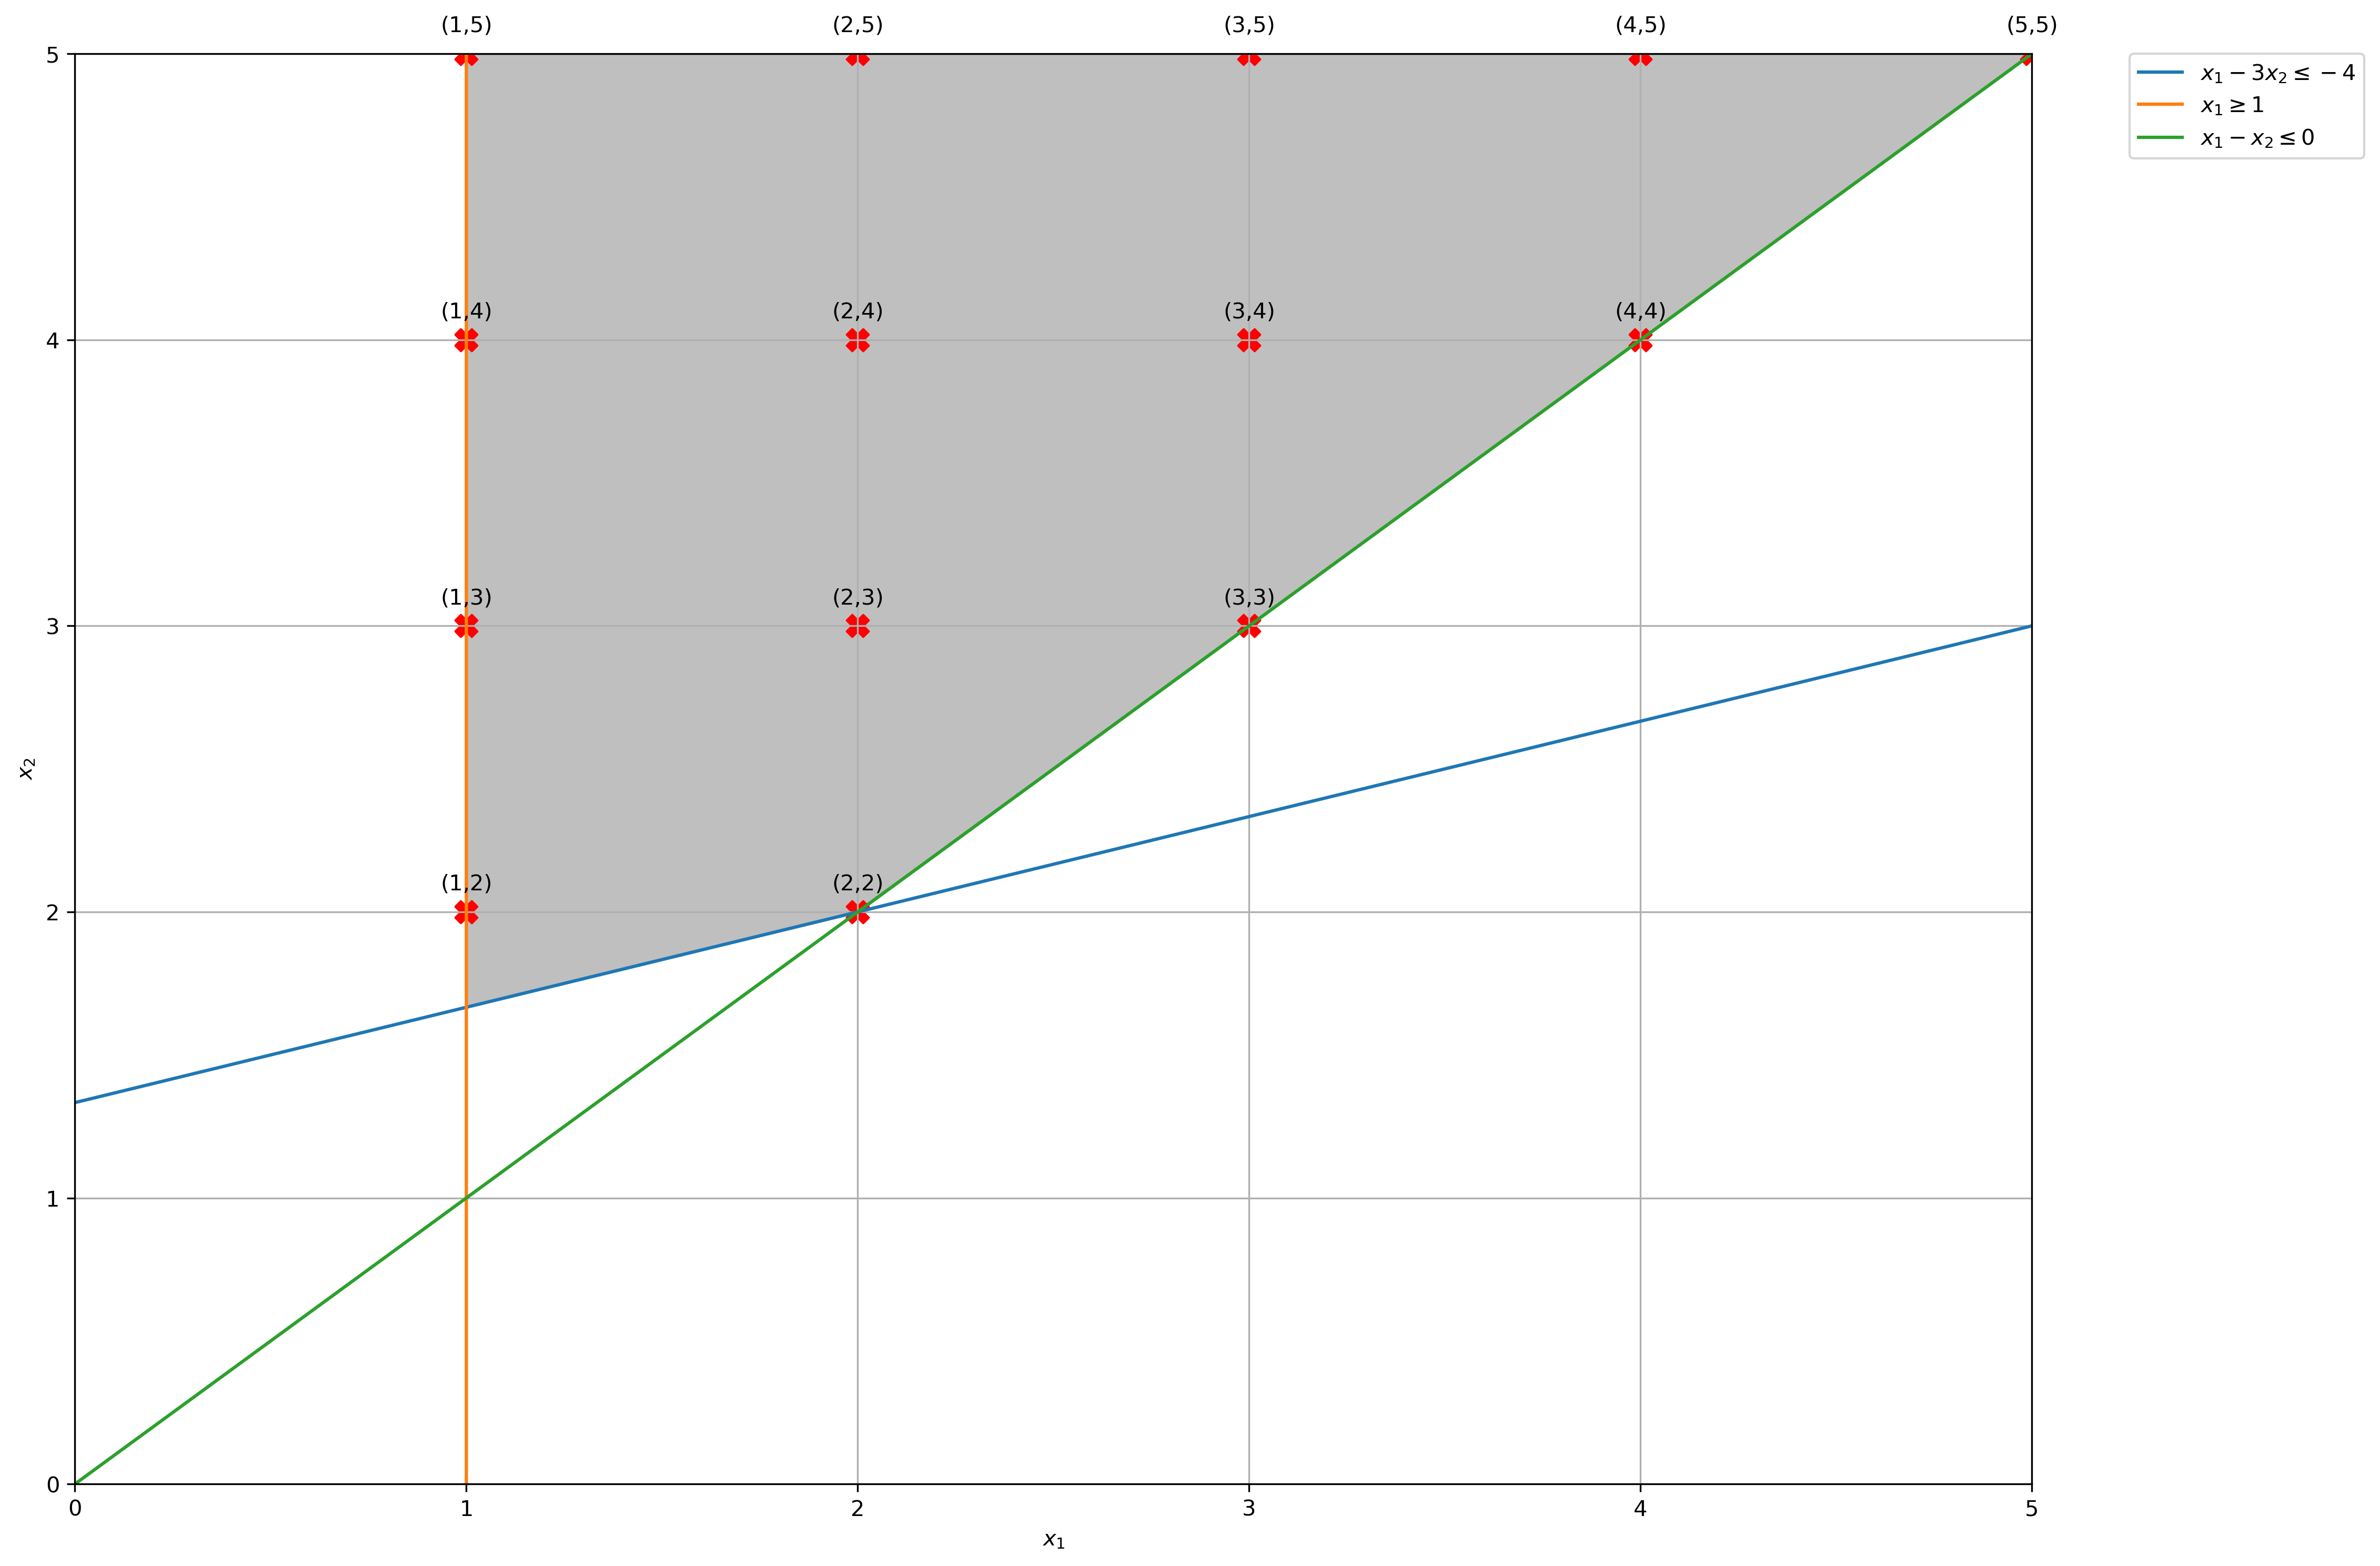

time: 1.64 s


<IPython.core.display.Javascript object>

In [35]:
# Construct lines
x1 = np.linspace(0, 5, 2000)  # x_1 >= 0
x2_2 = lambda x1: (x1 + 4) / 3  # constraint 2: 𝑥1−3𝑥2≤−4
x2_3 = lambda x1: [1] * len(x1)  # constraint 3: x_1 >= 1
x2_4 = lambda x1: x1  # constraint 4: 𝑥1−𝑥2≤0

# Make plot
plt.plot(x1, x2_2(x1), label=r"$x_1 - 3x_2 \leq -4$")
plt.plot([1] * len(x1), x1, label=r"$x_1 \geq 1$")
plt.plot(x1, x2_4(x1), label=r"$x_1 - x_2 \leq 0$")
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
ub = np.array([5] * 2000)
lb = np.maximum(x2_2(np.linspace(1, 5, 2000)), x2_4(np.linspace(1, 5, 2000)))
plt.fill_between(
    np.linspace(1, 5, 2000), lb, ub, where=ub > lb, color="grey", alpha=0.5
)

# Get Feasible Integer Points
feasible = lambda x: np.alltrue(
    [
        np.alltrue(np.array([[1, -3], [-1, 0], [1, -1]]) @ x <= np.array([-4, -1, 0])),
        np.alltrue(x >= 0),
    ]
)
feasible_integer_points = [
    (i, j) for i in range(6) for j in range(6) if feasible(np.array([i, j]))
]
plt.scatter(*list(zip(*feasible_integer_points)), marker="X", c="r", s=100)
for x, y in feasible_integer_points:
    label = f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [36]:
print(
    f"Integer points in Convex Hull X_hat of Dual Function: {feasible_integer_points}"
)

Integer points in Convex Hull X_hat of Dual Function: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5)]
time: 409 µs


<IPython.core.display.Javascript object>

In [37]:
expr = lambda x1, x2: -x1 - 2 * x2 + symbols("λ") * (x1 + x2 - 5)
[expr(x1, x2) for x1, x2 in feasible_integer_points]

[-2*λ - 5,
 -λ - 7,
 -9,
 λ - 11,
 -λ - 6,
 -8,
 λ - 10,
 2*λ - 12,
 λ - 9,
 2*λ - 11,
 3*λ - 13,
 3*λ - 12,
 4*λ - 14,
 5*λ - 15]

time: 7.85 ms


<IPython.core.display.Javascript object>

\begin{align}
    d(\lambda) &= \underset{x\in\hat{X}}{\text{minimize }} -x_1 - x_2 + \lambda(-3x_1 + 4x_2 - 4) \\
    &= \min\{ 
    -2\lambda - 5,
    -λ - 7,
    -9,
    λ - 11,
    -λ - 6,
    -8,
    λ - 10,
    2\lambda - 12,
    λ - 9,
    2\lambda - 11,
    3\lambda - 13,
    3\lambda - 12,
    4\lambda - 14,
    5\lambda - 15, \cdots
    \}\\
\end{align}

In [38]:
t = cp.Variable((1,), integer=False)
λ = cp.Variable((1,), integer=False)
constraints = [
    *[
        t <= lambdify(symbols("λ"), expr(x1, x2), "numpy")(λ)
        for x1, x2 in feasible_integer_points
    ],
    λ >= 0,
]
obj = cp.Maximize(t)
prob = cp.Problem(obj, constraints)
prob.solve()

print("Optimal Solution for Lagrangian Dual Relaxation")
print("=" * 30)
print(f"Status: {prob.status}")
print(f"The optimal value Z_dual is: {np.round(prob.value, 2)}")
print(f"The optimal solution is: λ = {np.round(λ.value[0], 2)}")

Optimal Solution for Lagrangian Dual Relaxation
Status: optimal
The optimal value Z_dual is: -9.0
The optimal solution is: λ = 2.0
time: 40.9 ms


<IPython.core.display.Javascript object>

In [39]:
print(
    "Integer Points associated with Optimal Dual Function in Convex Hull of Feasible Set of Lagrangian-relaxed problem: "
)
np.array(feasible_integer_points)[
    list(
        np.argwhere(
            np.isclose(
                [
                    lambdify(symbols("λ"), expr(x1, x2), "numpy")(2)
                    for x1, x2 in feasible_integer_points
                ],
                np.array([-9] * len(feasible_integer_points)),
            )
        ).flatten()
    )
]

Integer Points associated with Optimal Dual Function in Convex Hull of Feasible Set of Lagrangian-relaxed problem: 


array([[1, 2],
       [1, 3],
       [1, 4],
       [1, 5]])

time: 12.1 ms


<IPython.core.display.Javascript object>